# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import the necessary tools needed for the analysis
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [2]:
#upload your twitter-archive-enhanced.csv dataset. 
twitter_arc_en = pd.read_csv(r'C:\Users\Charles\Desktop\twitter-archive-enhanced.csv')
twitter_arc_en.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#save the image-predictions.tsv file and load it into image_pred_df

import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (r'C:\Users\Charles\Desktop\image-predictions-3.tsv', mode='wb') as file:
    file.write(response.content)
    
image_predi = pd.read_csv(r'C:\Users\Charles\Desktop\image-predictions-3.tsv',sep="\t")
image_predi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

In [5]:
tweet_ids = twitter_arc_en.tweet_id.values
len(tweet_ids)

2356

In [6]:
# Read the twitter json data from tweet_json.txt file. and append them to a list. 

twitter_list = []
with open(r'C:\Users\Charles\Desktop\tweet-json.txt', mode = 'r') as file:
    for row in file.readlines():
        tweet_dict = json.loads(row)
        retweet_count = tweet_dict['retweet_count']
        favorite_count = tweet_dict['favorite_count']
        tweet_id = tweet_dict['id']
        twitter_list.append({'tweet_id': tweet_id, 
                        'retweet_count': retweet_count, 
                        'favorite_count': favorite_count})    

In [7]:
# Creating DataFrame from list of dictionaries
twitter_arc_api = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_arc_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twitter_arc_en.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_arc_en.shape

(2356, 17)

In [10]:
twitter_arc_en.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_arc_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
#We observe that we have some missing values.
twitter_arc_en.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
#Our timestamp also have wrong data types. Objects instead of Date
twitter_arc_en['timestamp'].dtypes

dtype('O')

In [14]:
#We also have some issues with the name columns, some dogs have name as 'a' while others dont have any name but 'none.
twitter_arc_en.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
#Some columns contain html codes that repeats
twitter_arc_en.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Accessing the image predictions dataset

In [16]:
image_predi.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
#The data has 2075 values, but the twitter_archive_enhanced dataset has 2356 values. 
image_predi.shape

(2075, 12)

In [18]:
image_predi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Columns names are confusing and don't give more infomation
image_predi.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [20]:
#We can check to see if we have duplicates images,which we do have 66
image_predi.jpg_url.duplicated().sum()

66

In [21]:
#Non-dog records in the dataset like orange.
image_predi.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [22]:
#The predictions are sometimes uppercase, sometimes lowercase.
image_predi.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [23]:
#Check for missing values
image_predi.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
sum(image_predi.duplicated())

0

### Quality issues
1. Our timestamp also have wrong data types. Objects instead of Date
  
2. We observe that we have Missing values of dog stages and names.

3. We also have some issues with the name columns, some dogs have name as 'a' while others dont have any name but 'none.

4. We want to keep the original tweets, so tweet_ids which are retweets will be removed. 

5. Inaccurate values of rating denominator

6. There are multiple duplicates in the source column. 

7. Various prediction in p1, p2, and/or p3 are identifying the dog breed as non-dog values

8. Dealing with tweet_ids without image predictions in the image dataset.

### Tidiness issues
1. The columns doggo,floofer,pupper and puppo should be melted and should be in one column.

2. We observed that the data set should be merge with the twitter archive enhanced. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

# Make copies of original pieces of data


In [25]:
twitter_arc_new = twitter_arc_en.copy()
image_predi_new = image_predi.copy()
twitter_api_new = twitter_arc_api.copy()

# Quality issues 1

# Define
- Our timestamp also have wrong data types. Objects instead of datetime

In [26]:
#Code
twitter_arc_new.timestamp = pd.to_datetime(twitter_arc_new.timestamp)

In [27]:
#Test
twitter_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Quality issues 2

# Define
- We observe that we have Missing values of dog stages and names.
- Replace missing values named as None with NaN in name and dog stages columns

In [28]:
#Code
twitter_arc_new.name.replace('None', np.nan, inplace = True)
twitter_arc_new.doggo.replace('None', np.nan, inplace = True)
twitter_arc_new.floofer.replace('None', np.nan, inplace = True)
twitter_arc_new.pupper.replace('None', np.nan, inplace = True)
twitter_arc_new.puppo.replace('None', np.nan, inplace = True)

In [29]:
#Test
print(twitter_arc_new.query('name == "None"').name.count())
print(twitter_arc_new.query('doggo == "None"').doggo.count())
print(twitter_arc_new.query('doggo == "None"').floofer.count())
print(twitter_arc_new.query('doggo == "None"').pupper.count())
print(twitter_arc_new.query('doggo == "None"').puppo.count())


0
0
0
0
0


## Quality issues 3

# Define
- We want to keep the original tweets, so tweet_ids which are retweets will be removed.

In [30]:
#Code
twitter_arc_new = twitter_arc_new.query('retweeted_status_id == "NaN"')

In [31]:
#Test
twitter_arc_new.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Quality issues 4

# Define 
- Inaccurate values of rating denominator

In [32]:
#Code
twitter_arc_new= twitter_arc_new.query("rating_denominator == '10'")

In [33]:
#Test
twitter_arc_new.rating_denominator.value_counts()

Series([], Name: rating_denominator, dtype: int64)

## Quality issues 5

# Define
- There are multiple duplicates in the source column. 

In [34]:
#Code
twitter_arc_new.drop("source",axis=1,inplace=True)

In [35]:
#Test
twitter_arc_new.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Quality issues 6

#### Define
Some dogs in some images couldn't be identified as a certain dog breeds. We remove all rows where there are either no dog breeds for all p1_dog, p2_dog, and p3_dog columns.

In [36]:
#Code
image_predi_new = image_predi_new.loc[(image_predi_new['p1_dog']!=False) &(image_predi_new['p2_dog']!=False) & (image_predi_new['p3_dog']!=False)]

In [37]:
#Test
image_predi_new.loc[(image_predi_new['p1_dog']==False) &(image_predi_new['p2_dog']==False) & (image_predi_new['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Tidiness issue 1  
- We melt the columns of ["doggo", "flooter", "pupper", "puppo"], because we only need one "stage" column

#### Define

We will create one column "stage" containing the actual stage variable. We can drop the four columns 'doggo','floofer','pupper','puppo'.

In [38]:
#Code
twitter_arc_new['stage']= None
twitter_arc_new['stage'] = twitter_arc_new.doggo + twitter_arc_new.floofer + twitter_arc_new.pupper + twitter_arc_new.puppo


In [39]:
twitter_arc_new['stage'] = twitter_arc_new['stage'].map(lambda x: x.replace("None",""))

In [40]:
twitter_arc_new['stage'].value_counts()

Series([], Name: stage, dtype: int64)

In [41]:
twitter_arc_new.loc[twitter_arc_new.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_arc_new.loc[twitter_arc_new.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_arc_new.loc[twitter_arc_new.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
twitter_arc_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

In [42]:
twitter_arc_new.stage.value_counts()

Series([], Name: stage, dtype: int64)

### Tidiness issue 2
- Now, we merge the dataset "twitter_arc_new" with the table "twitter_api_new".

In [43]:
#Code
twitter_arc_new=pd.merge(twitter_arc_new, twitter_api_new, on='tweet_id', how='outer')

In [44]:
#Test
twitter_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       0 non-null      float64            
 1   in_reply_to_user_id         0 non-null      float64            
 2   timestamp                   0 non-null      datetime64[ns, UTC]
 3   text                        0 non-null      object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               0 non-null      object             
 8   rating_numerator            0 non-null      float64            
 9   rating_denominator          0 non-null      float64            
 10  name                        0 non-null      object          

## Storing

In [45]:
twitter_archive_master = pd.merge(twitter_arc_new, image_predi_new, on='tweet_id', how='inner')
twitter_archive_master

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1238,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1239,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1240,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [46]:
# Dimensions of dataframe
twitter_archive_master.shape

(1242, 26)

In [47]:
# Top 5 rows of the final cleaned dataframe
twitter_archive_master.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True


## Saving the cleaned dataframe to csv

In [60]:
twitter_archive_master.to_csv(r'C:\Users\Charles\Desktop\twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
#Load your data set from the newly created csv file 
twitter_insight = pd.read_csv(r'C:\Users\Charles\Desktop\twitter_archive_master.csv')

In [62]:
twitter_insight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       0 non-null      float64
 1   in_reply_to_user_id         0 non-null      float64
 2   timestamp                   0 non-null      float64
 3   text                        0 non-null      float64
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      float64
 7   expanded_urls               0 non-null      float64
 8   rating_numerator            0 non-null      float64
 9   rating_denominator          0 non-null      float64
 10  name                        0 non-null      float64
 11  stage                       0 non-null      float64
 12  tweet_id                    1242 non-null   int64  
 13  retweet_count               1242 

In [51]:
twitter_insight.p1.value_counts()

golden_retriever           126
Labrador_retriever          77
Pembroke                    77
Chihuahua                   54
pug                         41
                          ... 
wire-haired_fox_terrier      1
EntleBucher                  1
Japanese_spaniel             1
standard_schnauzer           1
silky_terrier                1
Name: p1, Length: 110, dtype: int64

# The most popular breed. 

In [52]:
# Get the total of "favorite_count" per breed
breed = twitter_insight.groupby("p1")
favorite = breed.favorite_count.sum()
favorite.sort_values(ascending=False)

p1
golden_retriever      1441670
Pembroke               946224
Labrador_retriever     745746
Chihuahua              457182
French_bulldog         372420
                       ...   
Appenzeller              2594
cairn                    2504
standard_schnauzer       2046
groenendael              1896
Japanese_spaniel         1362
Name: favorite_count, Length: 110, dtype: int64

Text(0.5, 1.0, 'The Most popular dog breed')

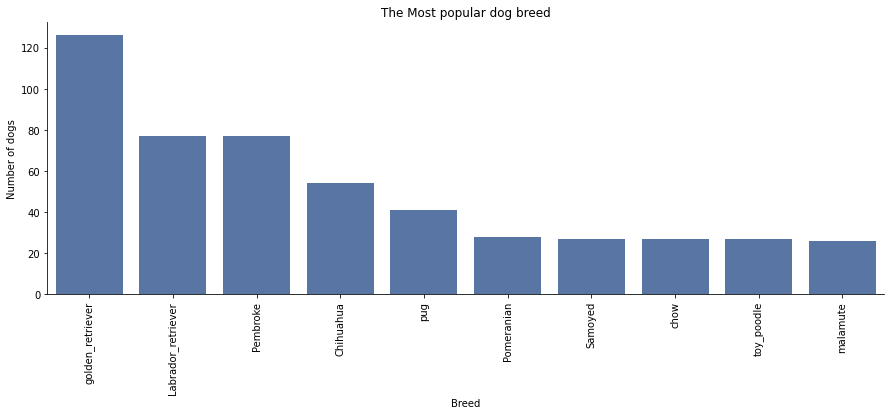

In [53]:
# Plot the dog breed with the highest likes.

plt.figure(figsize=[15,5])
freq = twitter_insight.p1.value_counts()
order = freq.iloc[:10].index
sns.countplot(data = twitter_insight, x="p1", order=order, color="#4C72B0");
plt.xticks(rotation=90)
plt.yticks([0,20,40,60,80,100,120])
sns.despine(bottom=False, left=False)
plt.xlabel("Breed")
plt.ylabel("Number of dogs")
plt.title("The Most popular dog breed")

From the above analysis, You will notice that the breed with the highest likes is the golden_retriever, next is the Labradoe_retriever and in 3rd place ,its the Pembroke. 

### **Retweet Distribution**

In [54]:
twitter_insight.retweet_count.describe()

count     1242.000000
mean      2911.089372
std       4890.192464
min         16.000000
25%        664.250000
50%       1489.500000
75%       3430.500000
max      56625.000000
Name: retweet_count, dtype: float64

Median (50%) is closer to the first quartile (25%) as compared to the third quartile (75%)

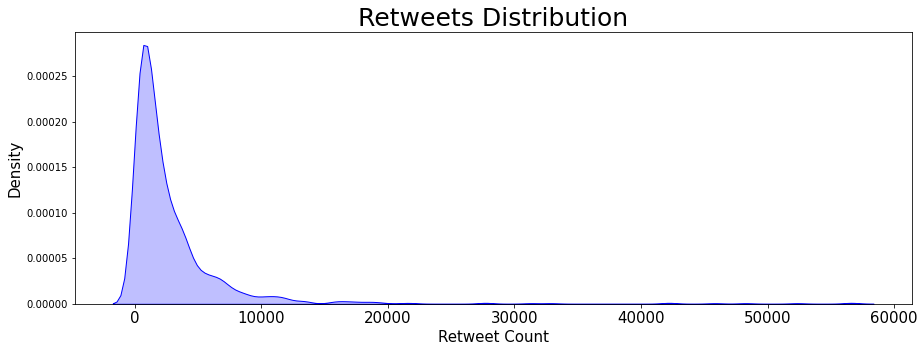

In [59]:
plt.figure(figsize = (15,5))
sns.kdeplot(twitter_insight.retweet_count, shade=True,color='blue', bw_adjust=0.5)
plt.title('Retweets Distribution', fontsize=25)
plt.ylabel('Density',fontsize=15)
plt.xlabel('Retweet Count', fontsize=15)
plt.xticks(fontsize=15);

From the above graph, it is evident that the retweets distribution is positively skewed, as it has very few large inputs at the end and based on calculations above median (50%) is closer to the first quartile (25%) as compared to the third quartile (75%). Also, the strength of skewness of the retweet distribution appears to be strong.

### Likes Distribution 

In [56]:
twitter_insight.favorite_count.describe()

count      1242.000000
mean       8999.791465
std       12458.846597
min           0.000000
25%        1908.250000
50%        4232.500000
75%       11347.750000
max      132810.000000
Name: favorite_count, dtype: float64

Median (50%) is equally distant to the both the quartiles i.e. first quartile (25%) and the third quartile (75%).

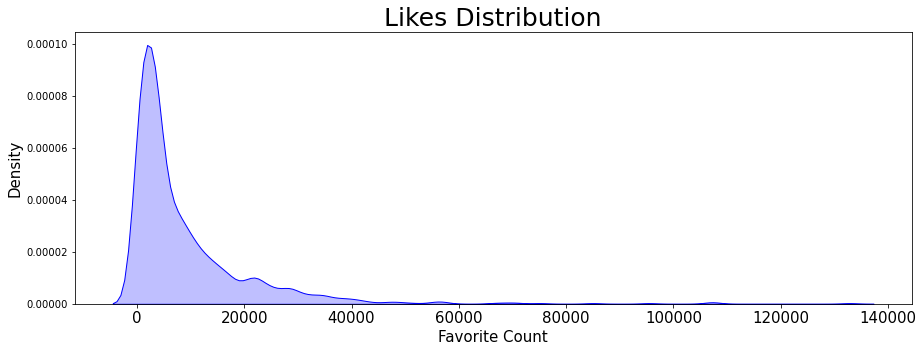

In [58]:
plt.figure(figsize = (15,5))
sns.kdeplot(twitter_insight.favorite_count, shade=True, color='blue', bw_adjust=0.5)
plt.title('Likes Distribution', fontsize=25)
plt.ylabel('Density',fontsize=15)
plt.xlabel('Favorite Count', fontsize=15)
plt.xticks(fontsize=15);

From the above graph, it is evident that the likes distribution  is positively skewed, as it has very few large inputs at the end and based on calculations above median (50%) is closer to the first quartile (25%) as compared to the third quartile (75%). Also, the strength of skewness of the likes distribution appears to be strong.